<a href="https://colab.research.google.com/github/FelipeCampos14/entregaveis-modulo7/blob/main/Semana6/Ponderada3/Ponderada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download de bibliotecas, Upload de dataset and configuração do pandas

In [ ]:
# baixando as bibliotecas necessárias
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install pingouin
!pip3 install pycaret[full]
!pip3 install datetime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from sklearn.ensemble import RandomForestClassifier
from pycaret.regression import *
from datetime import date, datetime

In [ ]:
# configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

In [ ]:
# pegando o dataset e subindo no notebook
df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='unicode_escape')

In [ ]:
# entendendo as colunas e qual o tipo delas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
# verificando a quantidade de dados NaN
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# Pre-processamento

In [ ]:
# Transformando os dados de data em datetime e depois usando a diferença entre a data de criação e o dia de hoje
df['created_month'] = df['created_month'].replace({'Jan':1,
                                                  'Feb':2,
                                                  'Mar':3,
                                                  'Apr':4,
                                                  'May':5,
                                                  'Jun':6,
                                                  'Jul':7,
                                                  'Aug':8,
                                                  'Sep':9,
                                                  'Oct':10,
                                                  'Nov':11,
                                                  'Dec':12})
df = df.sort_values(by=['created_year','created_month','created_date'])

df['created_year'] = df['created_year'].fillna(method='ffill')
df['created_month'] = df['created_month'].fillna(method='ffill')
df['created_date'] = df['created_date'].fillna(method='ffill')

year = df['created_year']
month = df['created_month']
date = df['created_date']

lista = list()
dici = dict()
for i,j,k in zip(date,month,year):
  dia = pd.to_datetime(f'{int(i)}/{int(j)}/{int(k)}', format='%d/%m/%Y')
  dici['creation'] = int((datetime.now() - dia).days)
  lista.append(dici.copy())

data = pd.DataFrame(lista)

# join do dataframe de data feito
df = df.join(data)

In [ ]:
# removendo as colunas de data nao mais necessárias de data
df = df.drop(columns={'created_year','created_month','created_date'})

In [ ]:
# Substituindo valores incoerentes(como uploads em zero ou lucro = 0, mesmo não sendo um canal Nonprofit) e aplicando valores médios(mediana) no lugar de NaN
df['uploads'] = df['uploads'].replace({0:df['uploads'].median()})

colunas_incoerentes = ['lowest_monthly_earnings','highest_monthly_earnings','lowest_yearly_earnings','highest_yearly_earnings','video_views_for_the_last_30_days','subscribers_for_last_30_days']
for i in colunas_incoerentes:
  df[i] = df[i].loc[(df['channel_type'] != 'Nonprofit')].replace({0:df[i].median()})
  df[i] = df[i].fillna(df[i].median())


In [ ]:
# Substituindo dados NaN categóricos por valores médios(moda)
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['channel_type'] = df['channel_type'].fillna(df['channel_type'].mode()[0])
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,creation
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,2860.0,32.0,5.0,21103000.0,5300.0,84400.0,63300.0,1000000.0,300000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,6168
187,188,Michael Jackson,28200000,1.441247e+10,Music,Michael Jackson,15,United States,US,Music,242.0,54.0,59.0,158591000.0,39600.0,634400.0,475800.0,7600000.0,200000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,5582
519,520,Apple,17300000,1.026425e+09,Science & Technology,Apple,180,United States,US,Tech,11274.0,130.0,9.0,46484000.0,11600.0,185900.0,139500.0,2200000.0,100000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,3626
70,71,Ishtar Music,41400000,1.760893e+10,Trailers,Ishtar Music,4510,India,IN,Music,155.0,20.0,28.0,180942000.0,45200.0,723800.0,542800.0,8700000.0,400000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,6307
427,428,shane,19200000,4.329121e+09,People & Blogs,shane,570,United States,US,Comedy,1705.0,114.0,22.0,2730000.0,683.0,10900.0,8200.0,131100.0,200000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,4083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,Chris Brown,25200000,1.552057e+10,Music,ChrisBrown,729,United States,NaN,Entertainment,3612215.0,NaN,NaN,64085000.0,13300.0,212700.0,159500.0,2600000.0,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,5149
468,469,Good Mythical Morning,18300000,8.798045e+09,Entertainment,Goodmythicalmorning,729,United States,NaN,Entertainment,3612215.0,3305.0,NaN,64085000.0,13300.0,212700.0,159500.0,2600000.0,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,3884
508,509,The Game Theorists,17600000,3.752347e+09,Gaming,TheGameTheorists,729,Australia,AU,Entertainment,3612215.0,6095.0,NaN,64085000.0,13300.0,212700.0,159500.0,2600000.0,200000.0,113.1,2.576660e+07,5.27,21844756.0,-25.274398,133.775136,3666
735,736,LEGENDA FUNK,14500000,2.440718e+09,Music,LegendaFUNK,729,Brazil,BR,Music,NaN,NaN,NaN,64085000.0,13300.0,212700.0,159500.0,2600000.0,200000.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,2682


# Data exploration

In [ ]:
# verificando a quantidade de dados NaN
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment 

<Figure size 800x550 with 0 Axes>

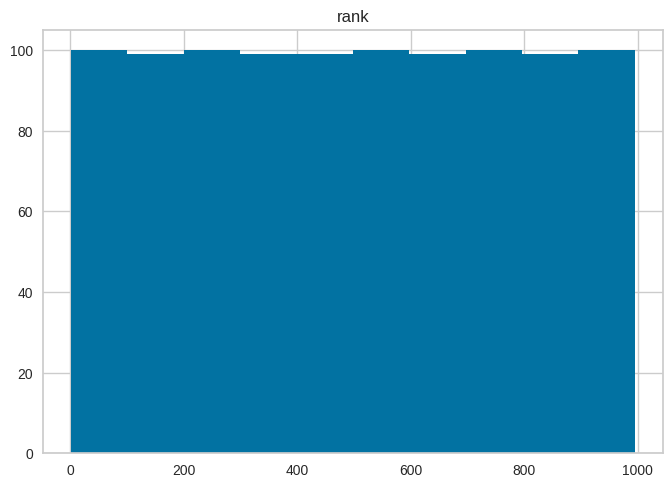

<Figure size 800x550 with 0 Axes>

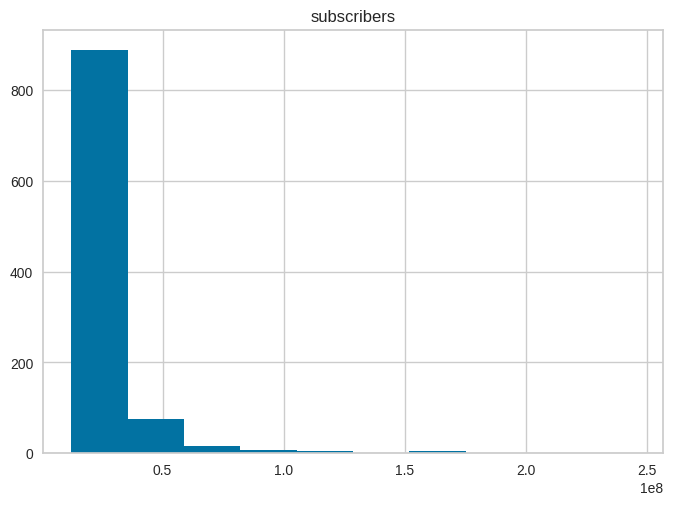

<Figure size 800x550 with 0 Axes>

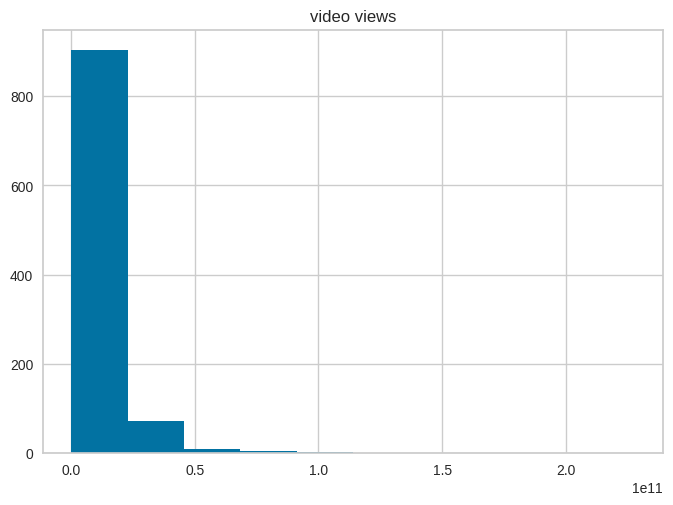

<Figure size 800x550 with 0 Axes>

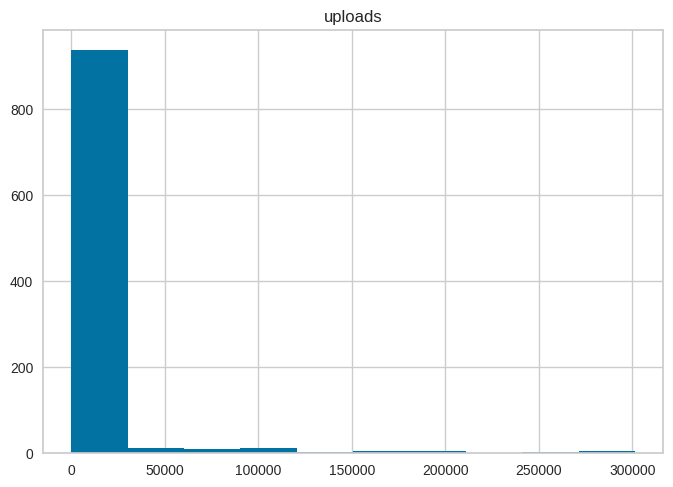

<Figure size 800x550 with 0 Axes>

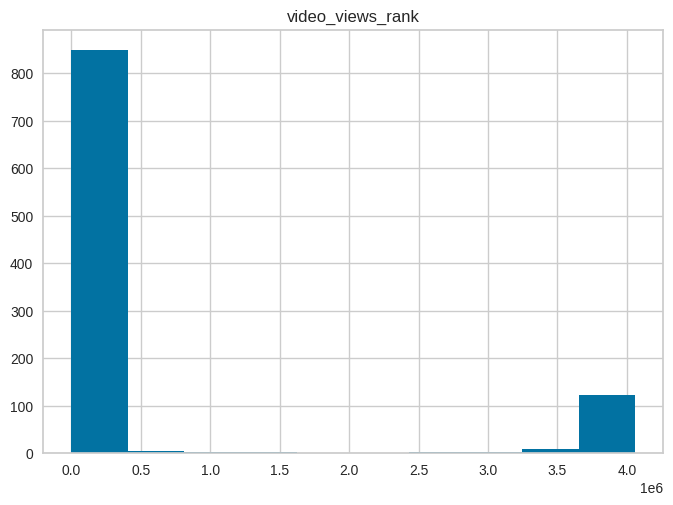

<Figure size 800x550 with 0 Axes>

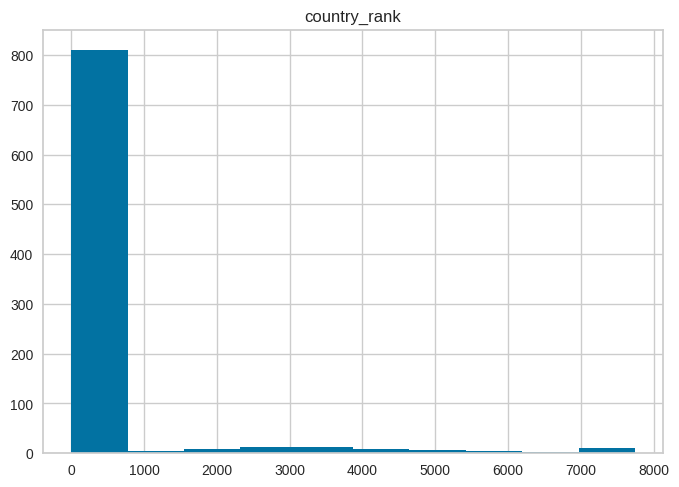

<Figure size 800x550 with 0 Axes>

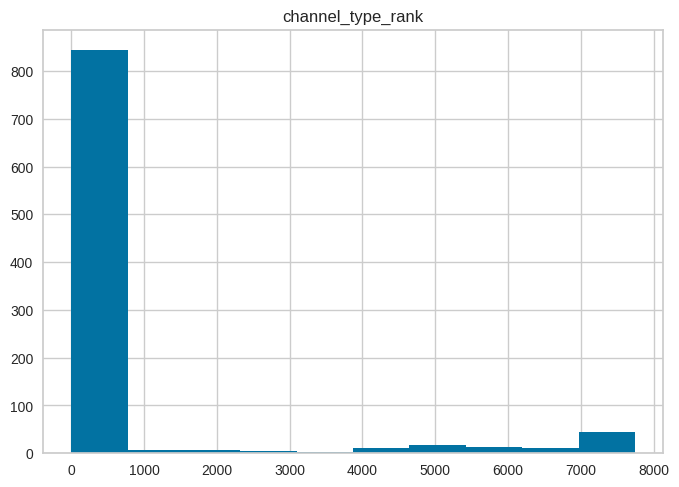

<Figure size 800x550 with 0 Axes>

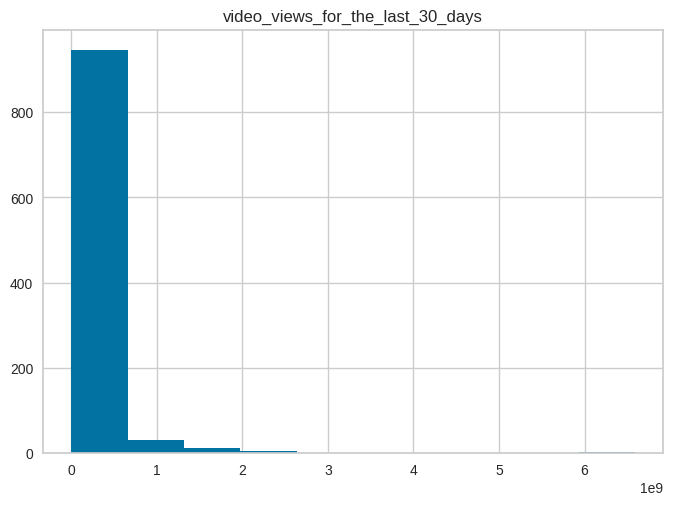

<Figure size 800x550 with 0 Axes>

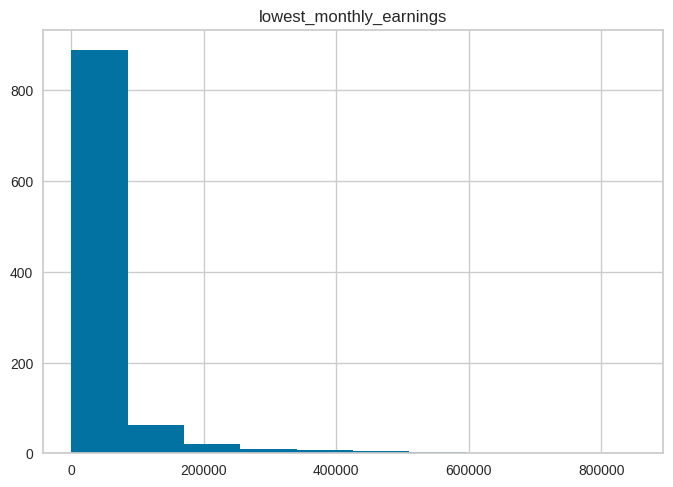

<Figure size 800x550 with 0 Axes>

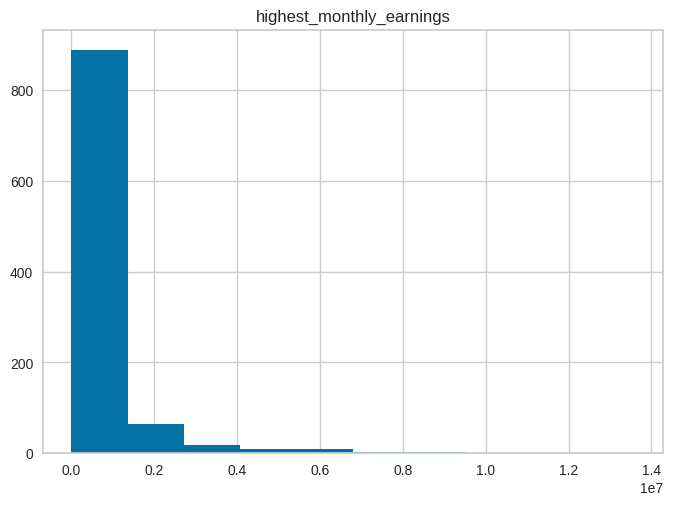

<Figure size 800x550 with 0 Axes>

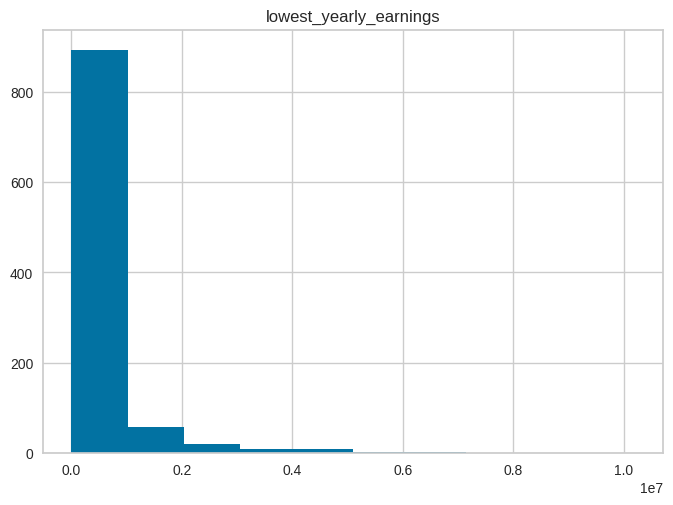

<Figure size 800x550 with 0 Axes>

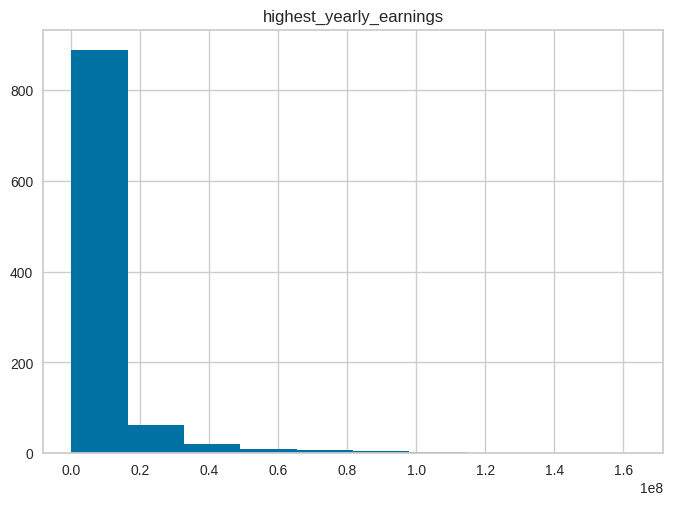

<Figure size 800x550 with 0 Axes>

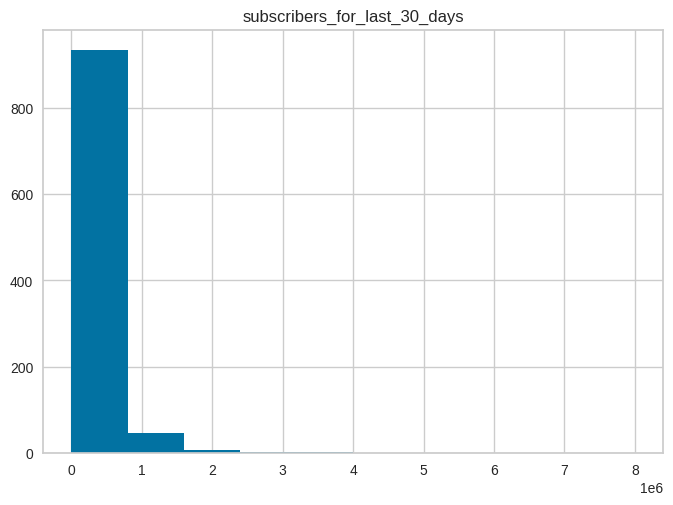

<Figure size 800x550 with 0 Axes>

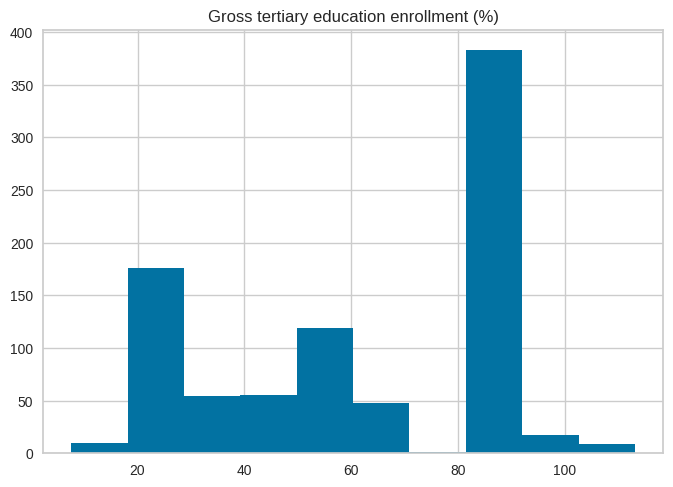

<Figure size 800x550 with 0 Axes>

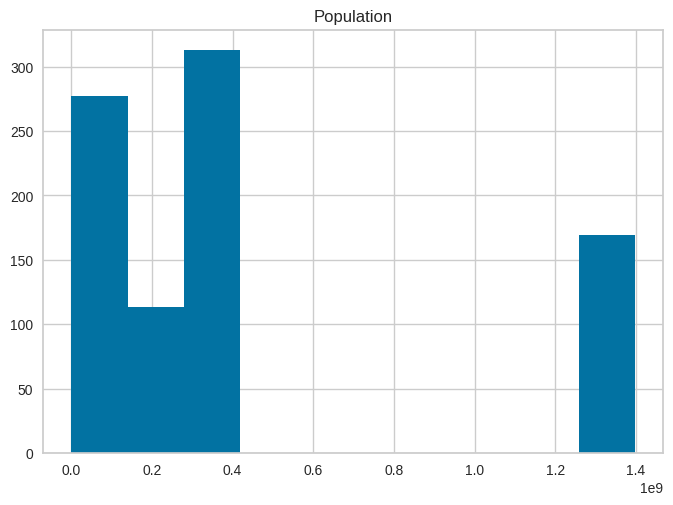

<Figure size 800x550 with 0 Axes>

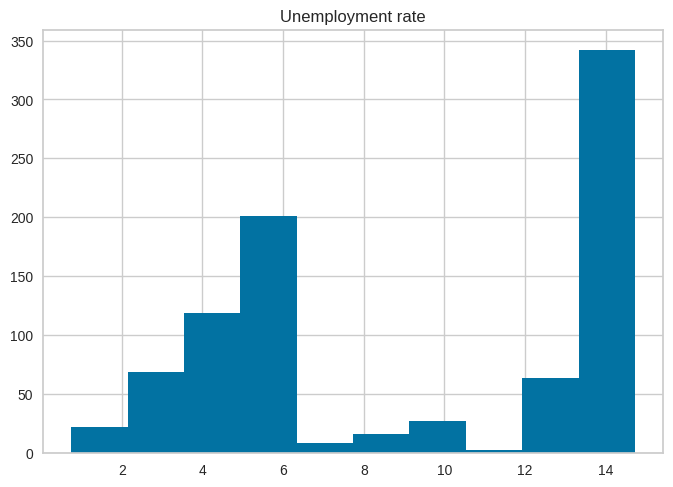

<Figure size 800x550 with 0 Axes>

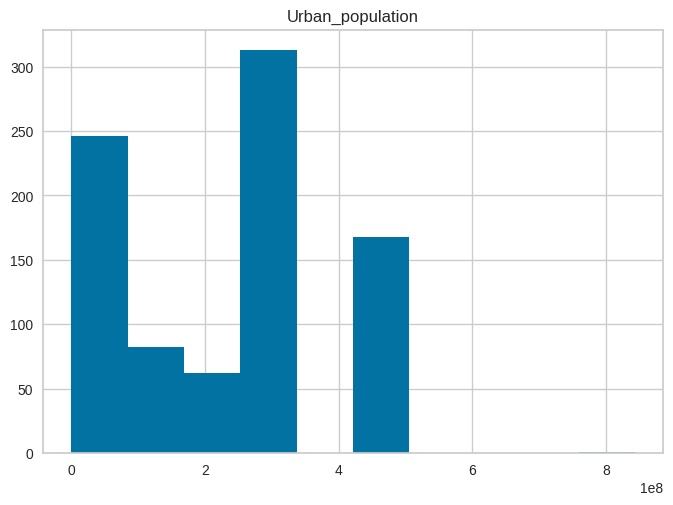

<Figure size 800x550 with 0 Axes>

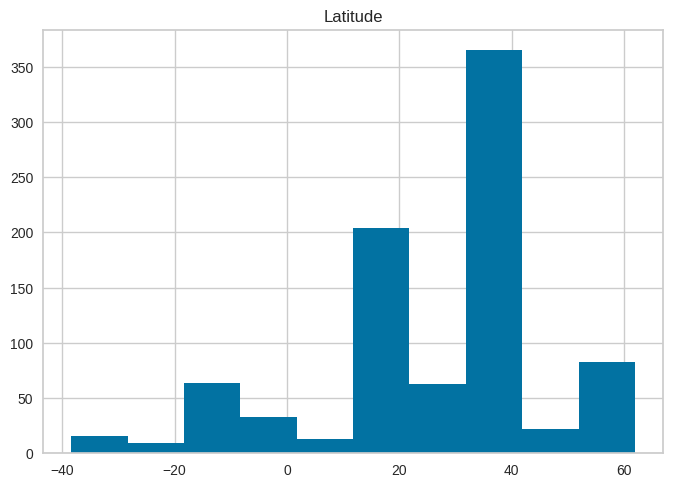

<Figure size 800x550 with 0 Axes>

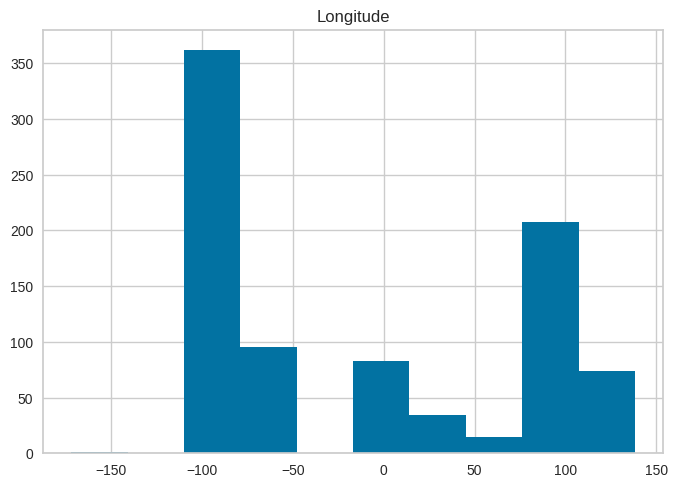

<Figure size 800x550 with 0 Axes>

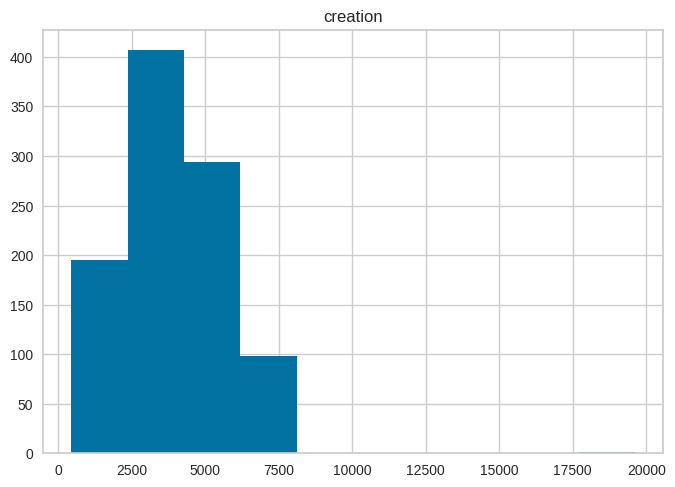

In [ ]:
# entendendo a distribuição dos dados
columns_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

for column in columns_numeric:
    plt.figure()
    df.hist([column])

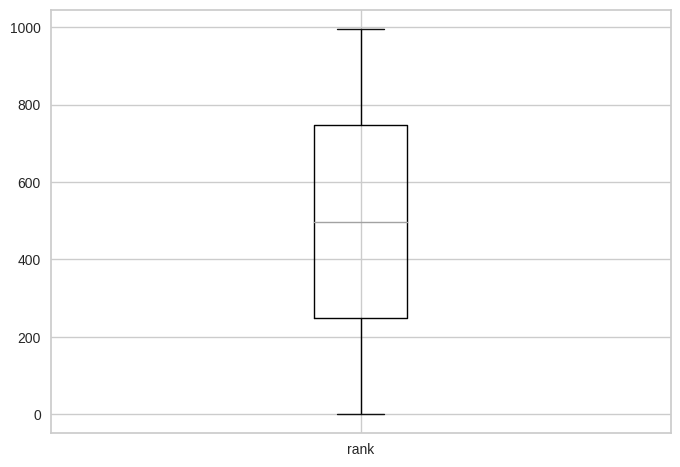

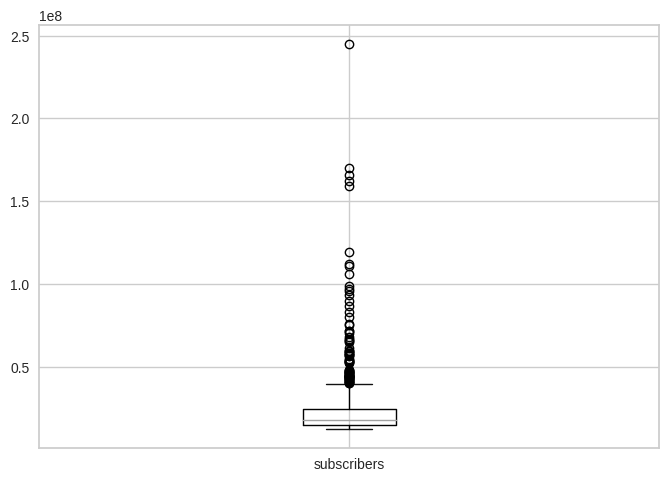

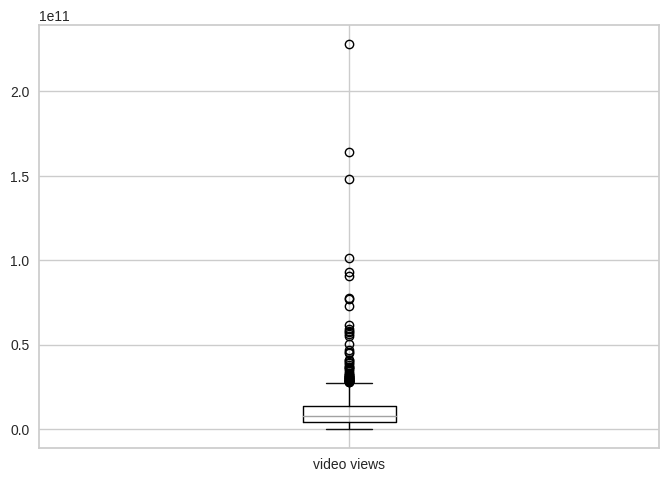

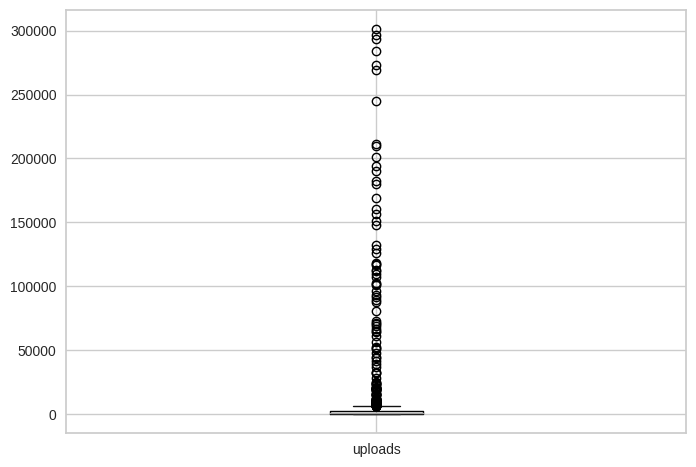

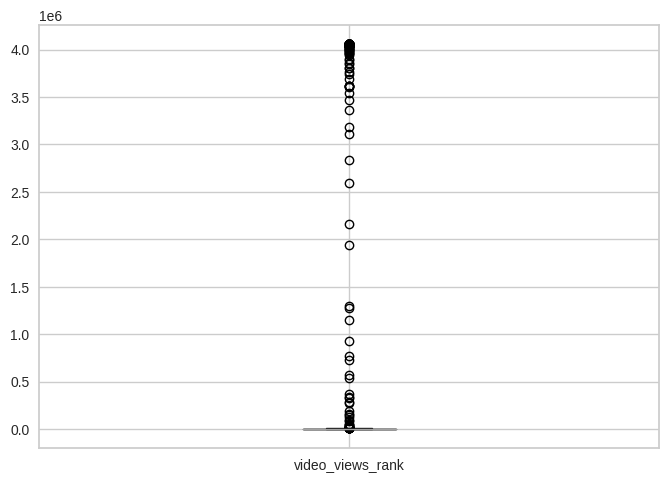

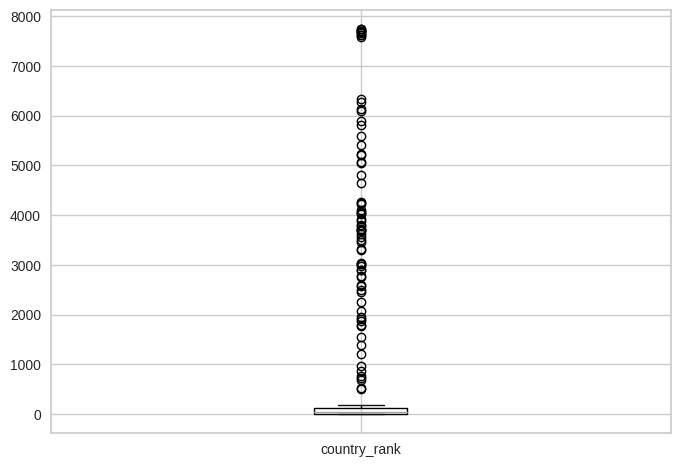

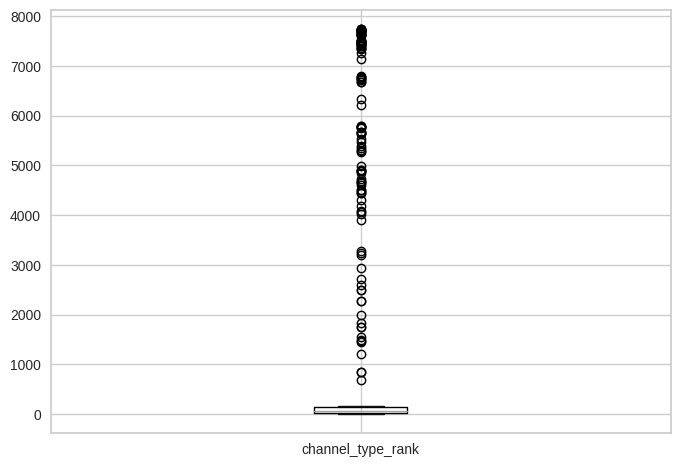

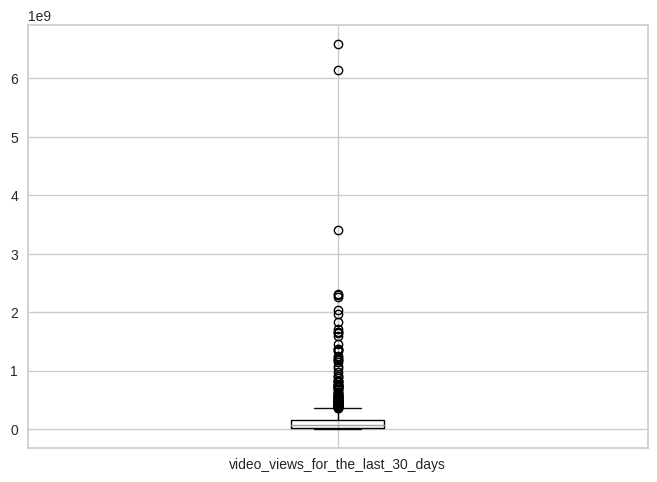

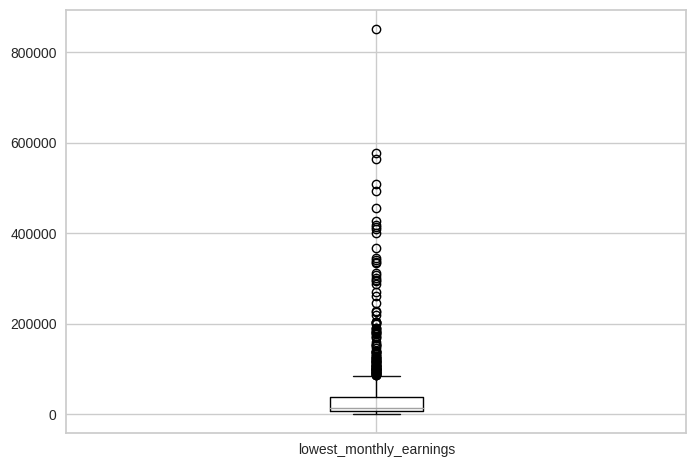

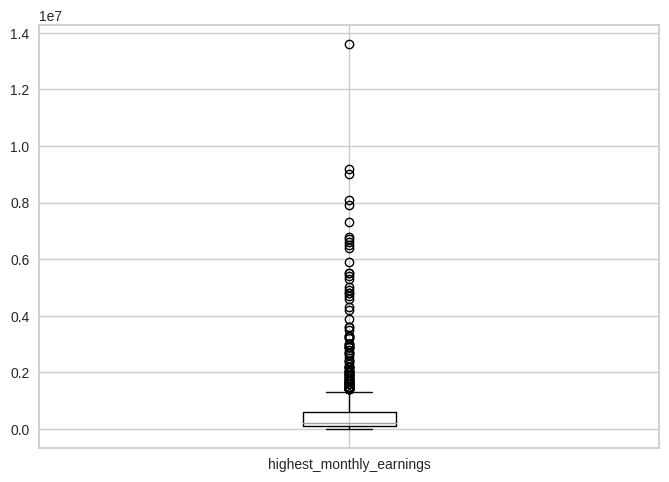

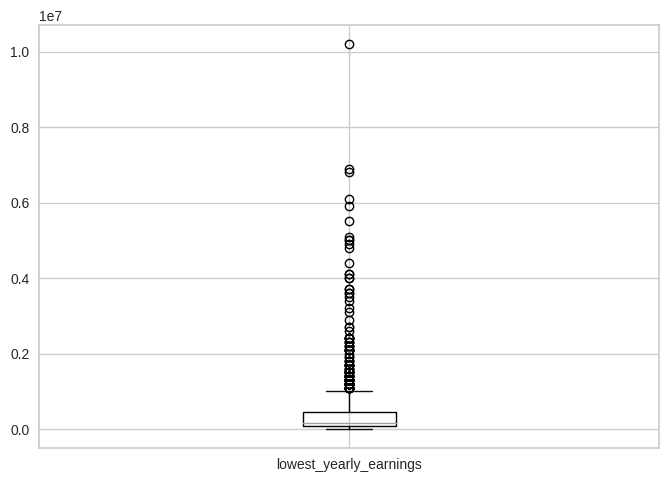

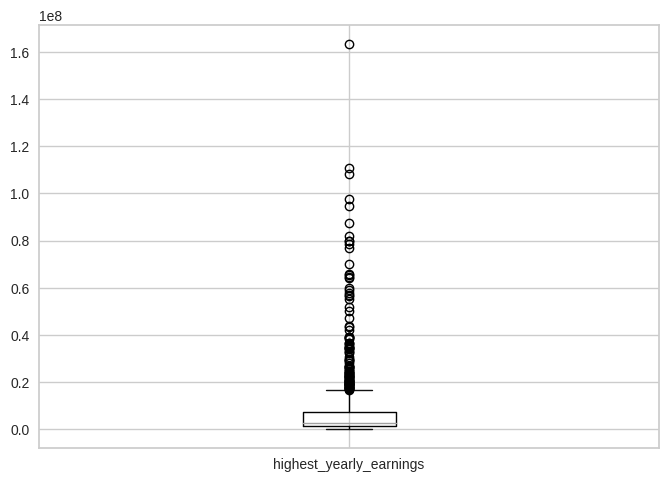

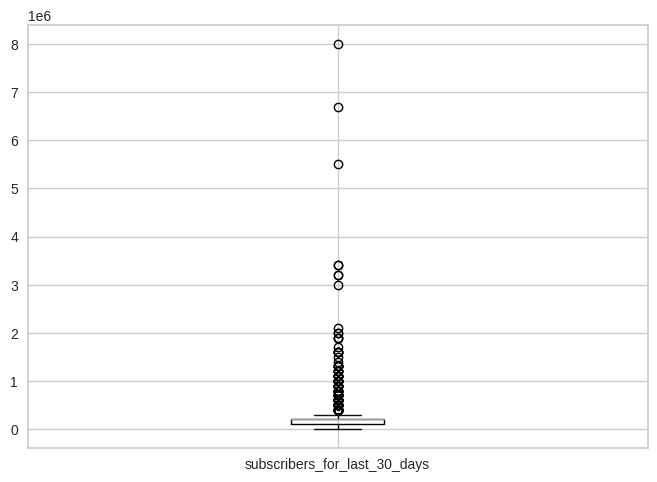

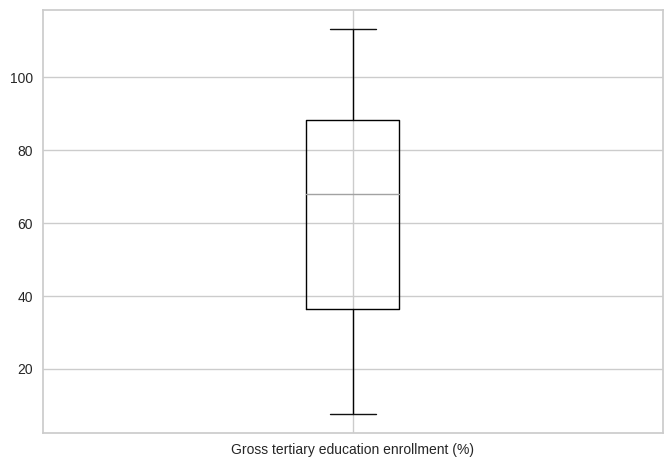

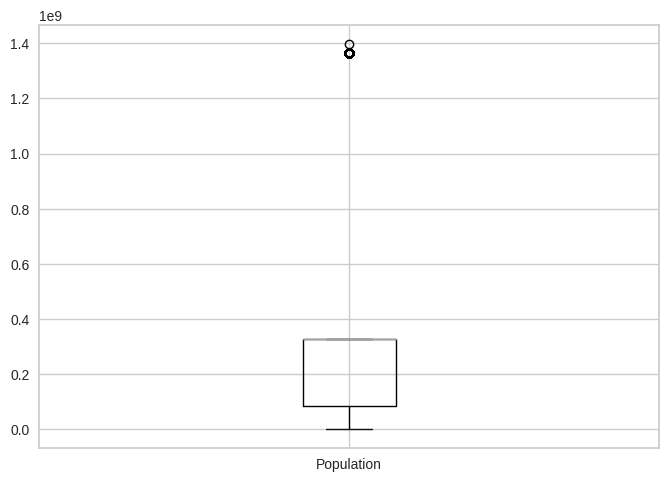

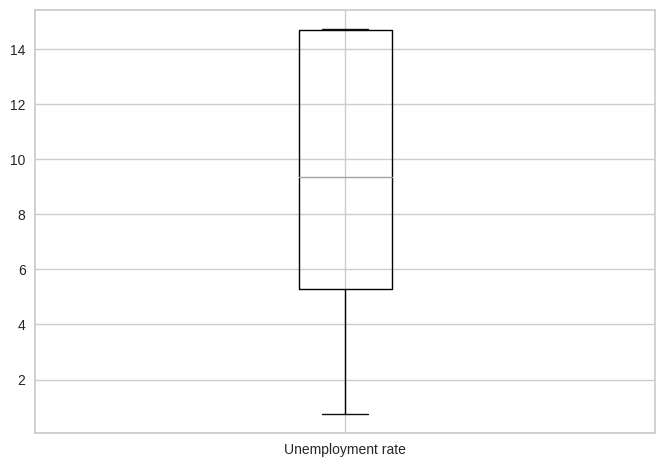

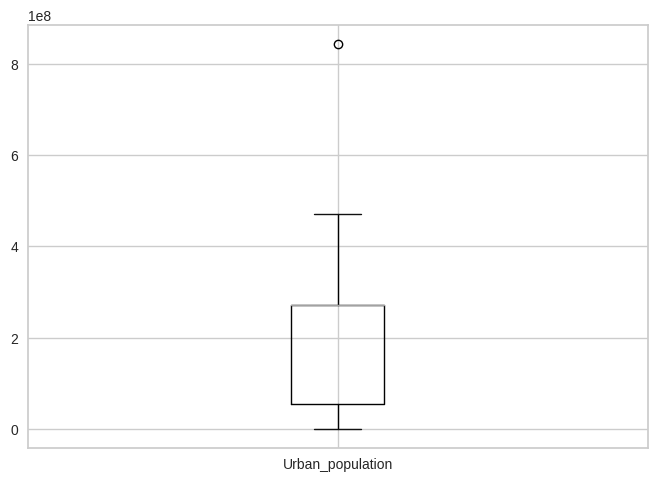

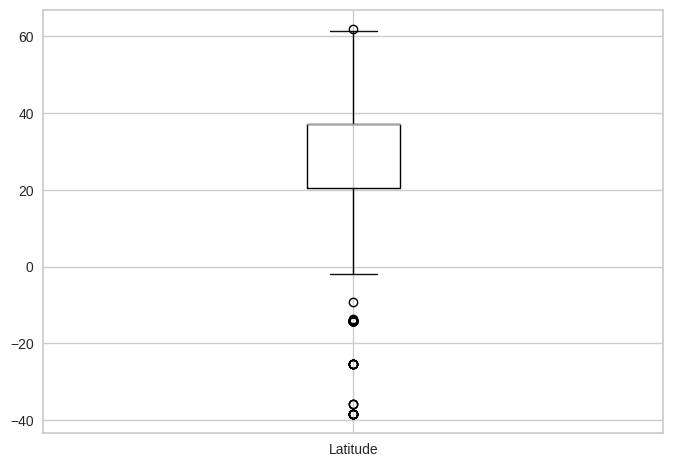

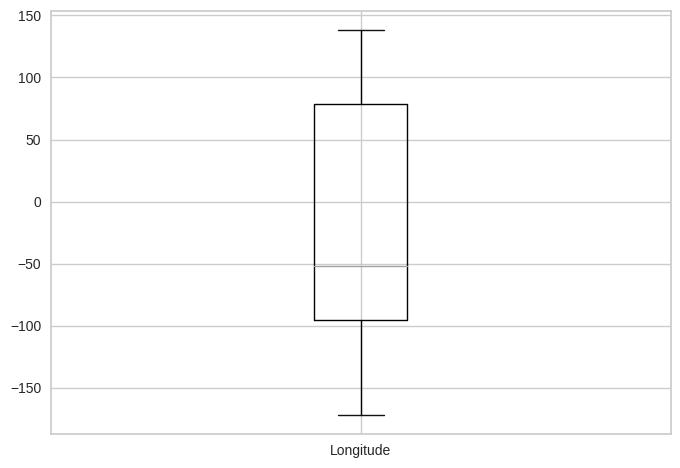

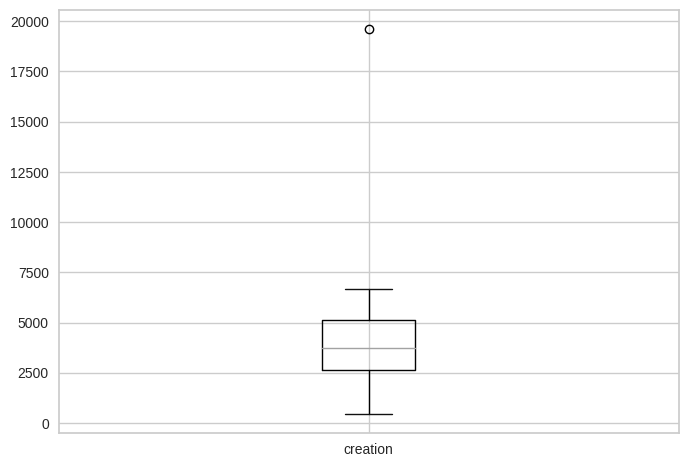

In [ ]:
# procurando outliers
columns_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

for column in columns_numeric:
    plt.figure()
    df.boxplot([column])

# Feature Engineering

## Matriz de correlação

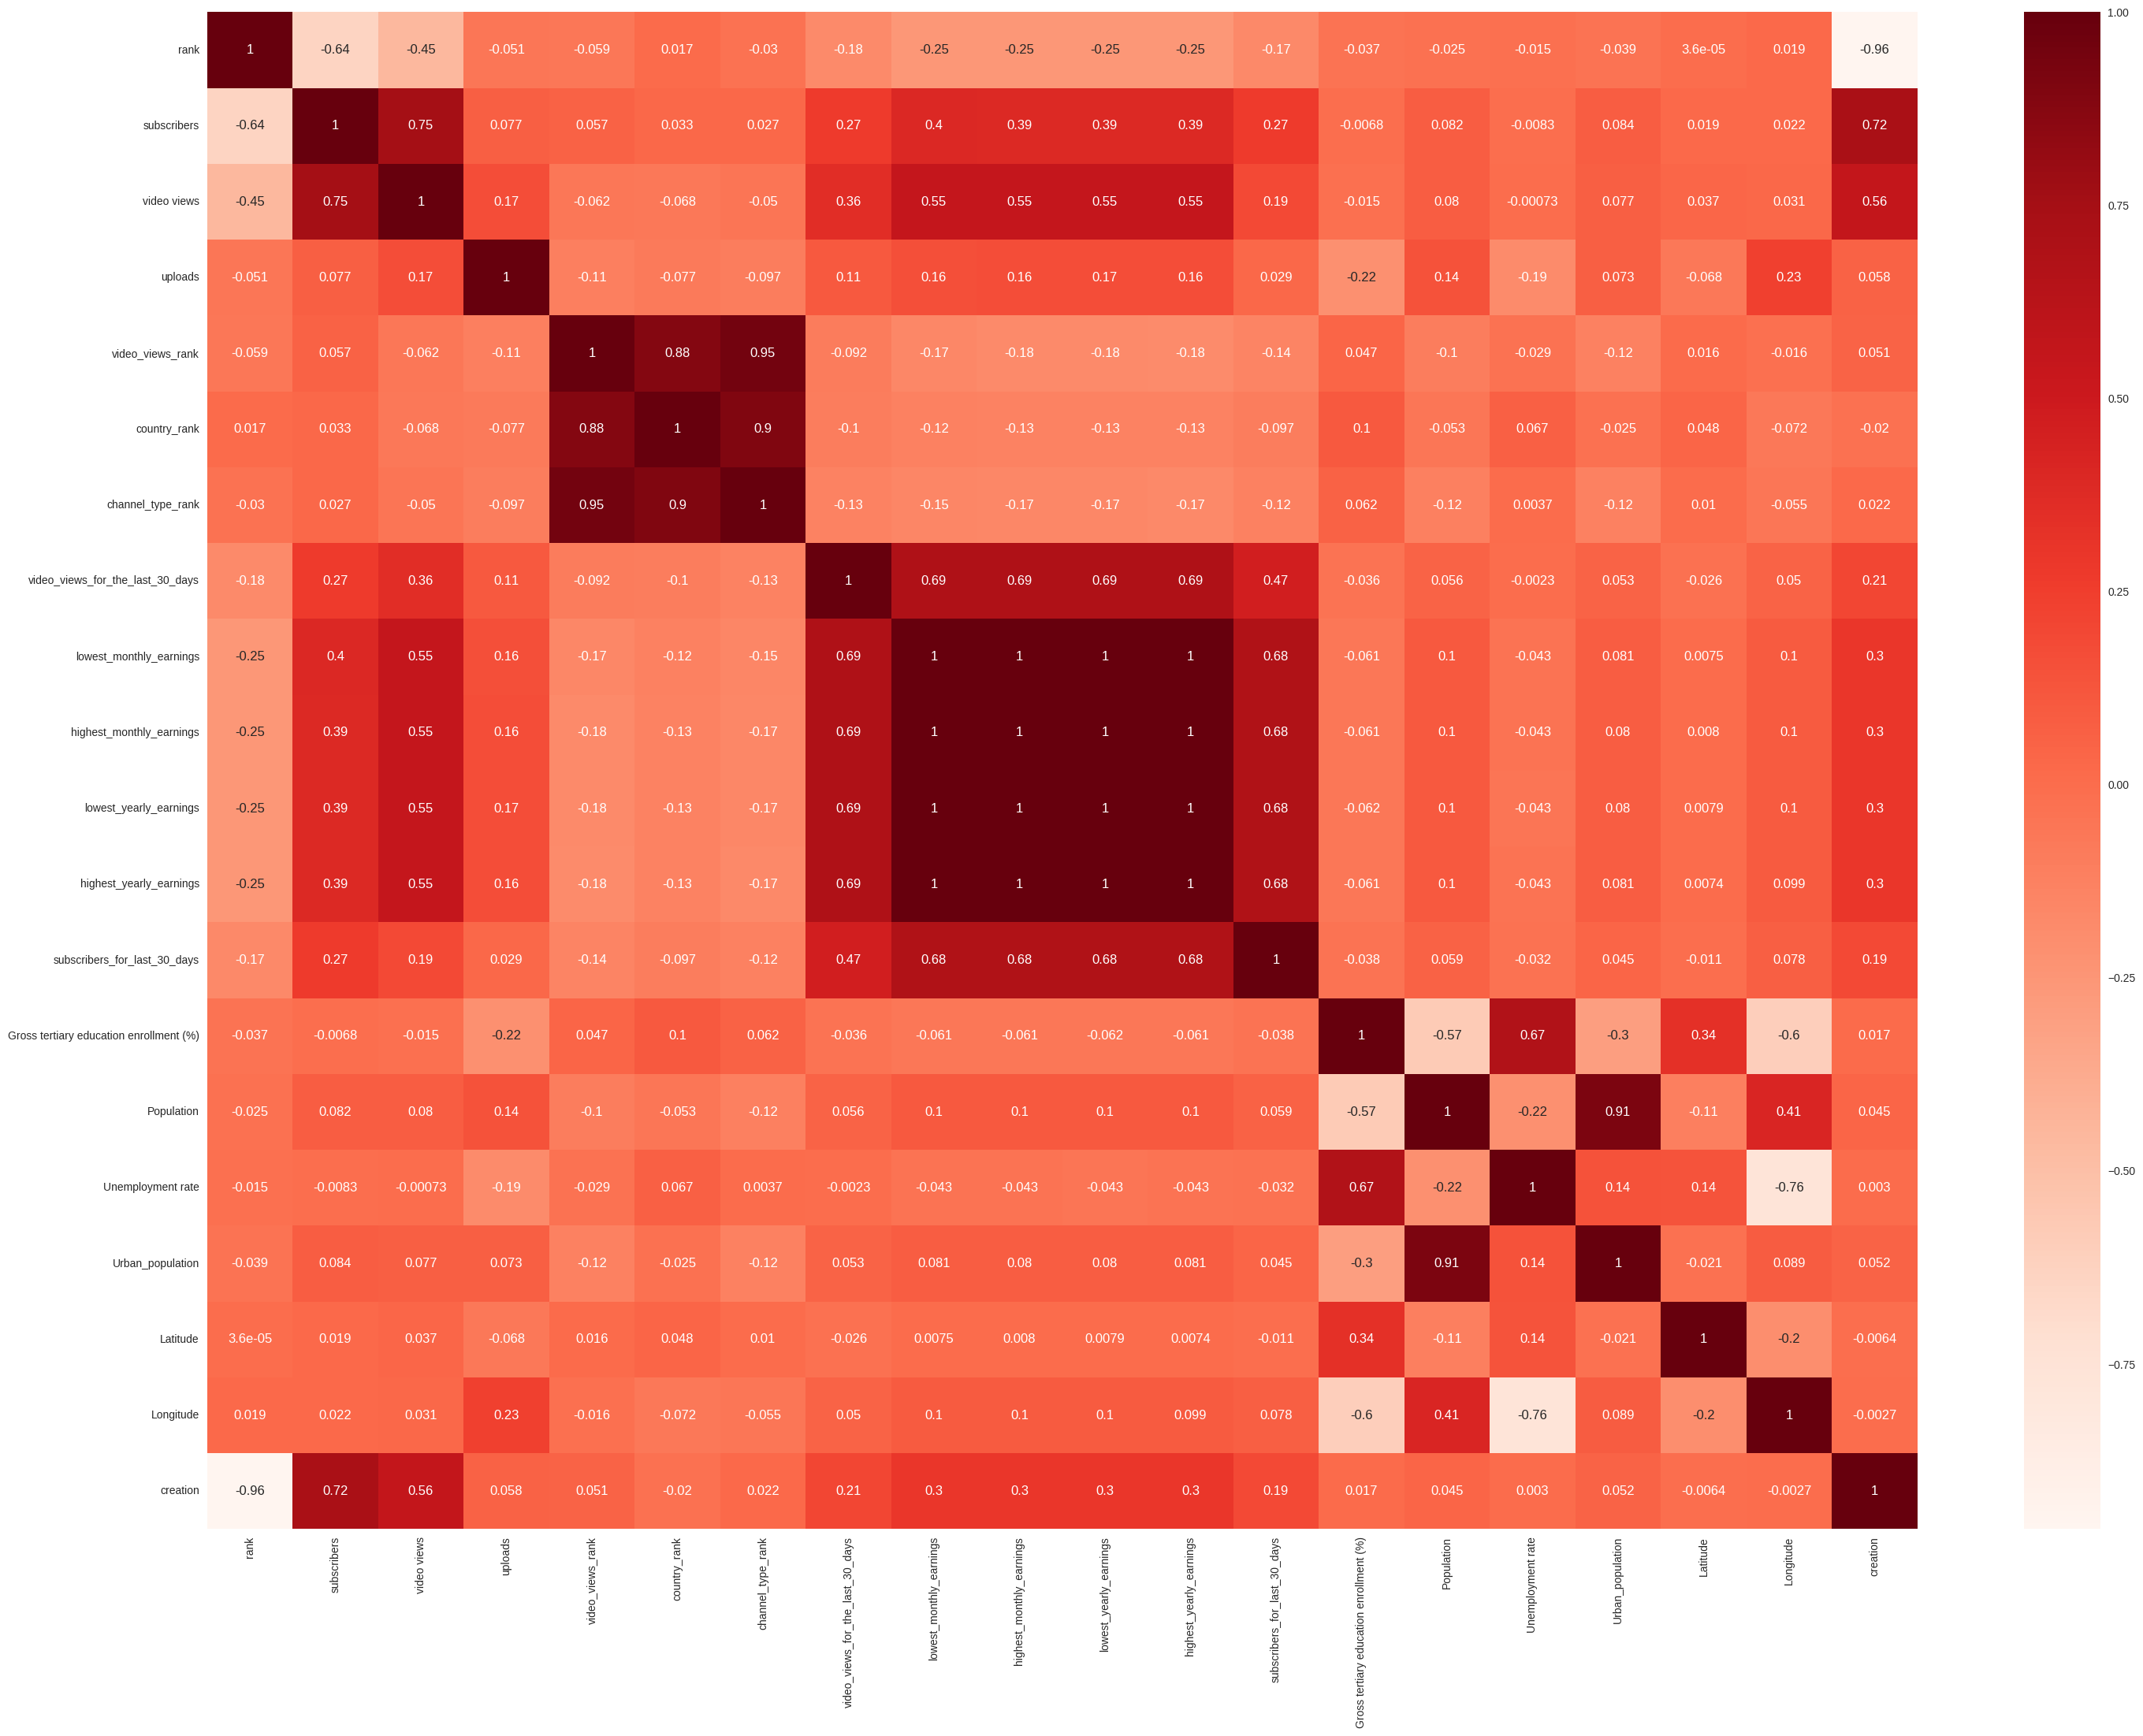

In [ ]:
# verificando correlação entre colunas numericas
plt.figure(figsize=(35,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

obs: há alta correlação entre algumas das colunas, impossibitando de usar todas no modelo. Para solucionar isso deve-se selecionar **uma** para entrar como feature no modelo

In [ ]:
# dropando colunas com alta correlação
pre_modelo = df.drop(columns={'country_rank','channel_type_rank','highest_monthly_earnings','lowest_monthly_earnings','lowest_yearly_earnings','highest_yearly_earnings','subscribers_for_last_30_days'})

## Provando correlação entre Colunas com variáveis categóricas(país) e numéricas(população, população urbana, taxa de desemprego, latitude, longitude, taxa de alunos no ensino superior)

In [ ]:
df.groupby('Country')['Latitude'].unique()

Country
Afghanistan                  [33.93911]
Andorra                           [nan]
Argentina                  [-38.416097]
Australia                  [-25.274398]
Bangladesh                  [23.684994]
Barbados                    [13.193887]
Brazil                     [-14.235004]
Canada                      [56.130366]
Chile                      [-35.675147]
China                        [35.86166]
Colombia                     [4.570868]
Cuba                        [21.521757]
Ecuador                     [-1.831239]
Egypt                       [26.820553]
El Salvador                 [13.794185]
Finland                      [61.92411]
France                      [46.227638]
Germany                     [51.165691]
India                       [20.593684]
Indonesia                   [-0.789275]
Iraq                        [33.223191]
Italy                        [41.87194]
Japan                       [36.204824]
Jordan                      [30.585164]
Kuwait                       [29

In [ ]:
df.groupby('Country')['Longitude'].unique()

Country
Afghanistan                   [67.709953]
Andorra                             [nan]
Argentina                    [-63.616672]
Australia                    [133.775136]
Bangladesh                    [90.356331]
Barbados                     [-59.543198]
Brazil                        [-51.92528]
Canada                      [-106.346771]
Chile                        [-71.542969]
China                        [104.195397]
Colombia                     [-74.297333]
Cuba                         [-77.781167]
Ecuador                      [-78.183406]
Egypt                         [30.802498]
El Salvador                   [-88.89653]
Finland                       [25.748151]
France                         [2.213749]
Germany                       [10.451526]
India                          [78.96288]
Indonesia                    [113.921327]
Iraq                          [43.679291]
Italy                          [12.56738]
Japan                        [138.252924]
Jordan                    

In [ ]:
df.groupby('Country')['Gross tertiary education enrollment (%)'].unique()

Country
Afghanistan                   [9.7]
Andorra                       [nan]
Argentina                    [90.0]
Australia                   [113.1]
Bangladesh                   [20.6]
Barbados                     [65.4]
Brazil                       [51.3]
Canada                       [68.9]
Chile                        [88.5]
China                        [50.6]
Colombia                     [55.3]
Cuba                         [41.4]
Ecuador                      [44.9]
Egypt                        [35.2]
El Salvador                  [29.4]
Finland                      [88.2]
France                       [65.6]
Germany                      [70.2]
India                        [28.1]
Indonesia                    [36.3]
Iraq                         [16.2]
Italy                        [61.9]
Japan                        [63.2]
Jordan                       [34.4]
Kuwait                       [54.4]
Latvia                       [88.1]
Malaysia                     [45.1]
Mexico              

In [ ]:
df.groupby('Country')['Unemployment rate'].unique()

Country
Afghanistan                 [11.12]
Andorra                       [nan]
Argentina                    [9.79]
Australia                    [5.27]
Bangladesh                   [4.19]
Barbados                    [10.33]
Brazil                      [12.08]
Canada                       [5.56]
Chile                        [7.09]
China                        [4.32]
Colombia                     [9.71]
Cuba                         [1.64]
Ecuador                      [3.97]
Egypt                       [10.76]
El Salvador                  [4.11]
Finland                      [6.59]
France                       [8.43]
Germany                      [3.04]
India                        [5.36]
Indonesia                    [4.69]
Iraq                        [12.82]
Italy                        [9.89]
Japan                        [2.29]
Jordan                      [14.72]
Kuwait                       [2.18]
Latvia                       [6.52]
Malaysia                     [3.32]
Mexico              

In [ ]:
df.groupby('Country')['Urban_population'].unique()

Country
Afghanistan                    [9797273.0]
Andorra                              [nan]
Argentina                     [41339571.0]
Australia                     [21844756.0]
Bangladesh                    [60987417.0]
Barbados                         [89431.0]
Brazil                       [183241641.0]
Canada                        [30628482.0]
Chile                         [16610135.0]
China                        [842933962.0]
Colombia                      [40827302.0]
Cuba                           [8739135.0]
Ecuador                       [11116711.0]
Egypt                         [42895824.0]
El Salvador                    [4694702.0]
Finland                        [4716888.0]
France                        [54123364.0]
Germany                       [64324835.0]
India                        [471031528.0]
Indonesia                    [151509724.0]
Iraq                          [27783368.0]
Italy                         [42651966.0]
Japan                        [115782416.0]
Jor

In [ ]:
df.groupby('Country')['Population'].unique()

Country
Afghanistan                   [38041754.0]
Andorra                              [nan]
Argentina                     [44938712.0]
Australia                     [25766605.0]
Bangladesh                   [167310838.0]
Barbados                        [287025.0]
Brazil                       [212559417.0]
Canada                        [36991981.0]
Chile                         [18952038.0]
China                       [1397715000.0]
Colombia                      [50339443.0]
Cuba                          [11333483.0]
Ecuador                       [17373662.0]
Egypt                        [100388073.0]
El Salvador                    [6453553.0]
Finland                        [5520314.0]
France                        [67059887.0]
Germany                       [83132799.0]
India                       [1366417754.0]
Indonesia                    [270203917.0]
Iraq                          [39309783.0]
Italy                         [60297396.0]
Japan                        [126226568.0]
Jor

In [ ]:
# drop de colunas desnecessárias
modelo = pre_modelo.drop(columns={'Youtuber','Longitude','Latitude','Population','Unemployment rate','Urban_population','Gross tertiary education enrollment (%)','Title','Abbreviation','category','uploads','video_views_rank'})

# Modelagem

## Perfil dos dados selecionados para o modelo

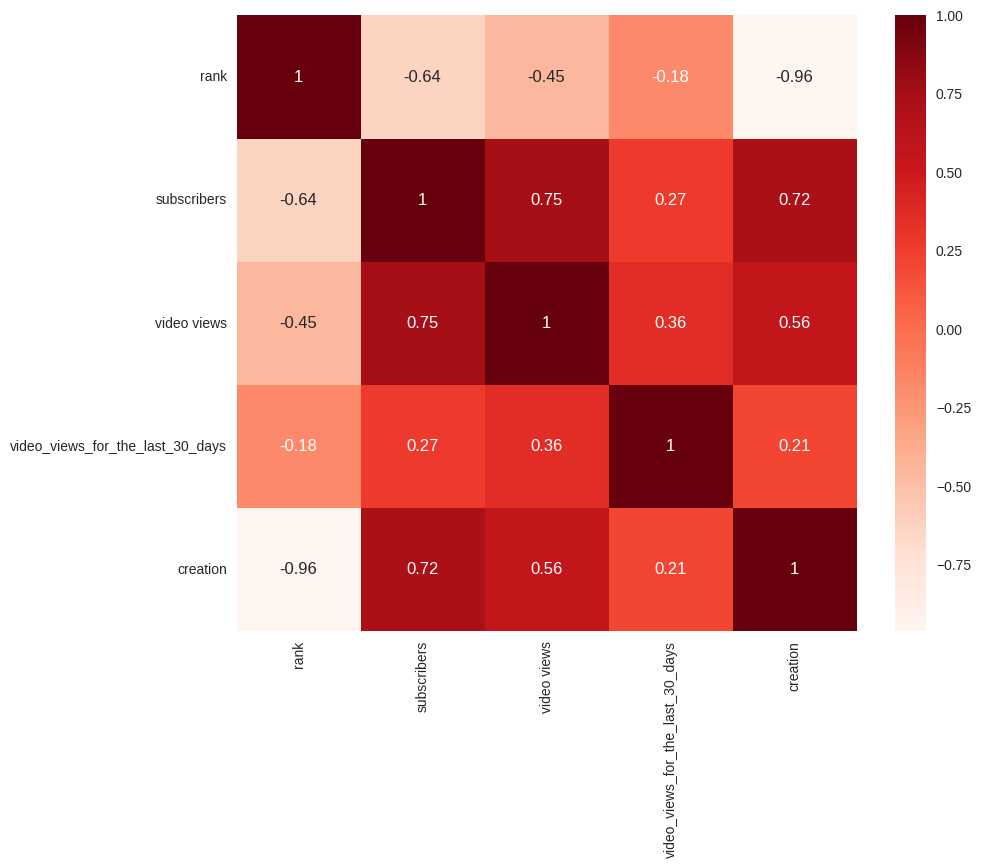

In [ ]:
# verificando correlação entre colunas numericas
plt.figure(figsize=(10,8))
cor = modelo.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Figure size 800x550 with 0 Axes>

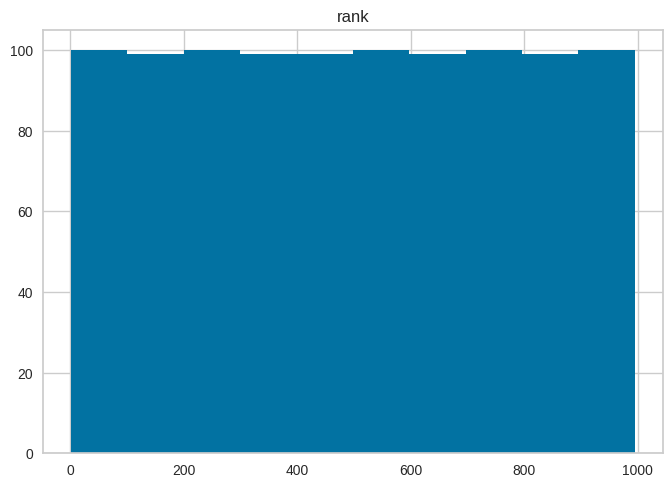

<Figure size 800x550 with 0 Axes>

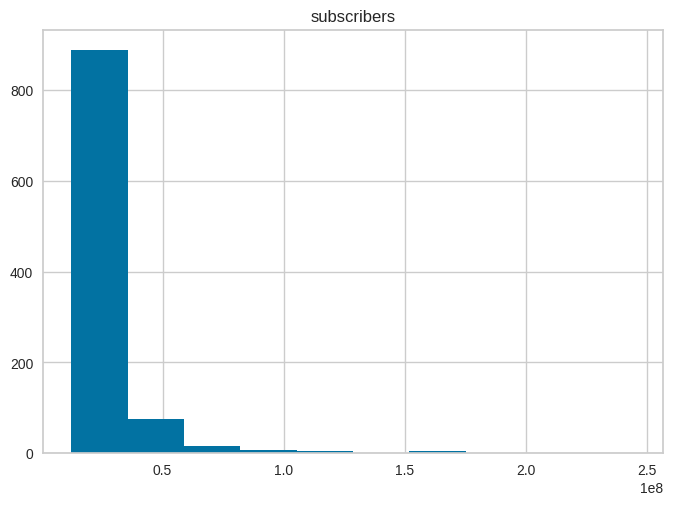

<Figure size 800x550 with 0 Axes>

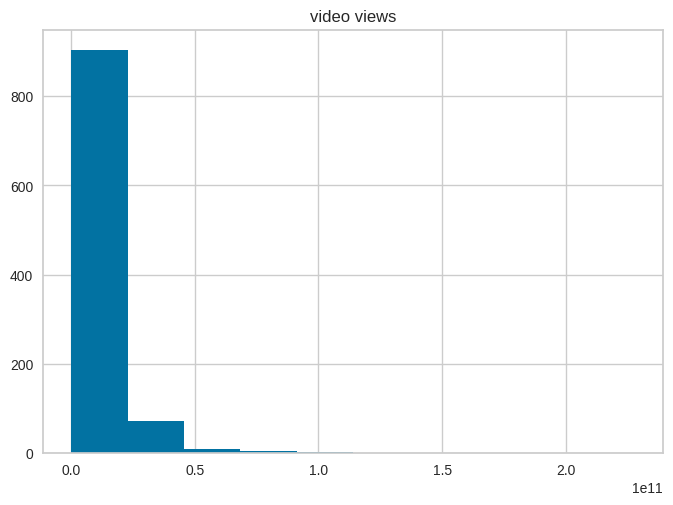

<Figure size 800x550 with 0 Axes>

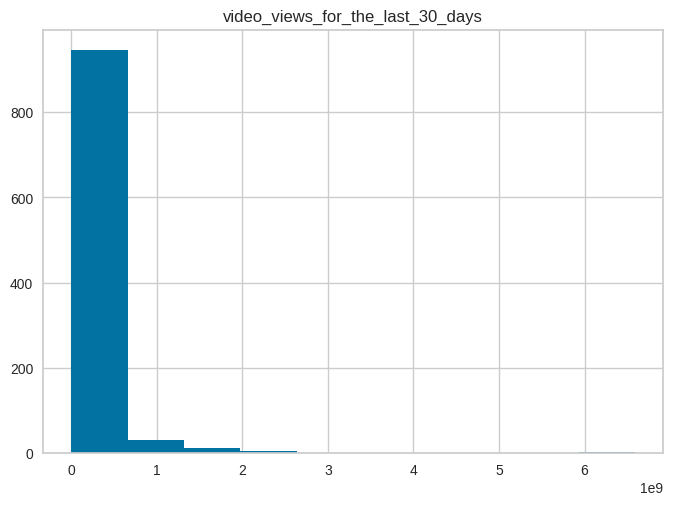

<Figure size 800x550 with 0 Axes>

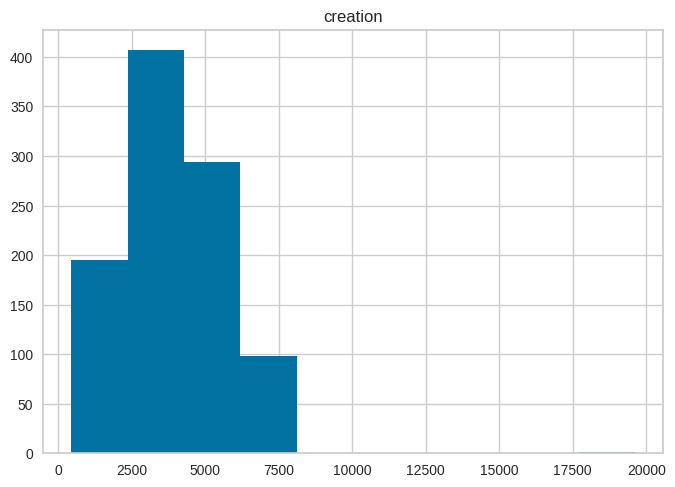

In [ ]:
# entendendo a distribuição dos dados
columns_numeric = modelo.select_dtypes(include=['int64', 'float64']).columns.to_list()

for column in columns_numeric:
    plt.figure()
    modelo.hist([column])

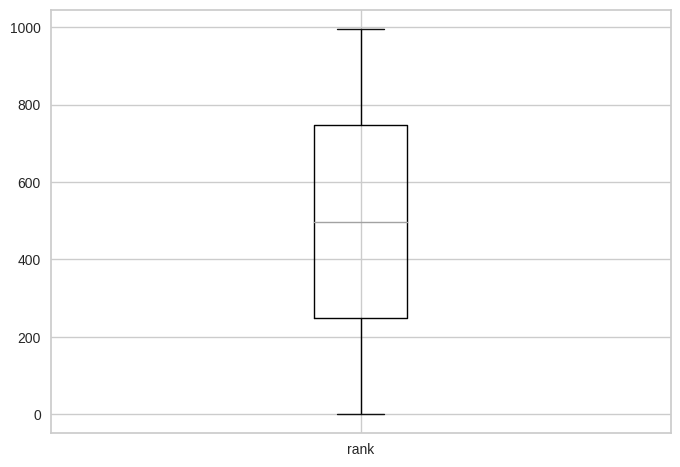

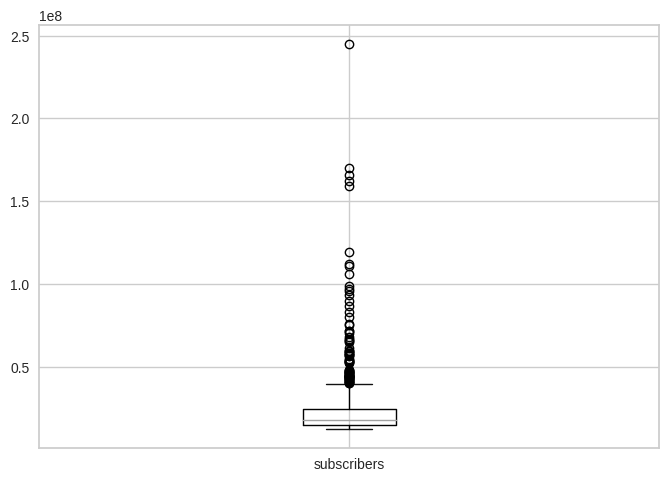

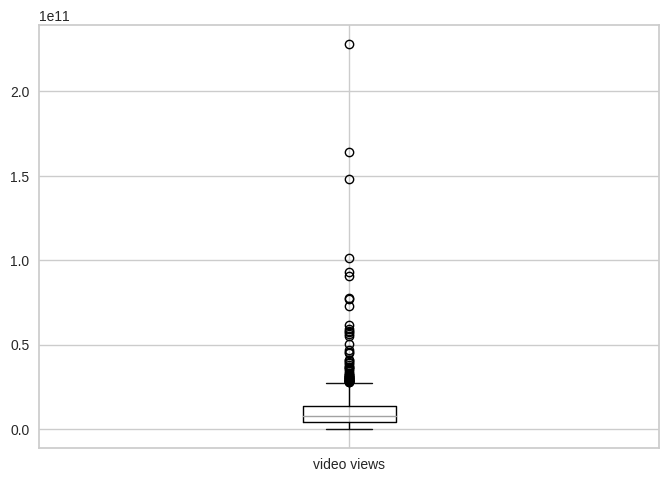

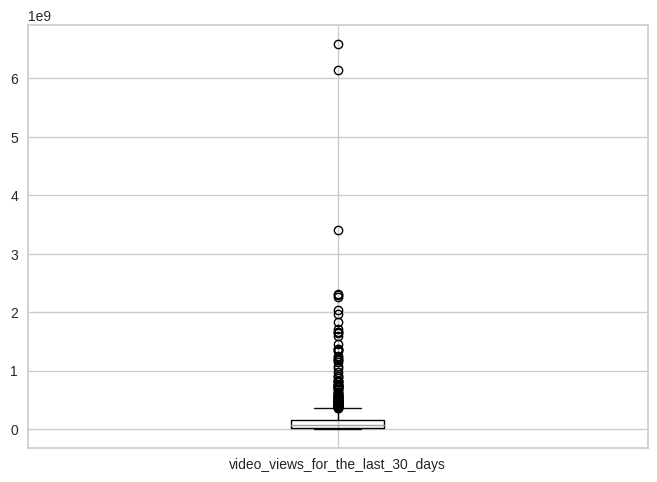

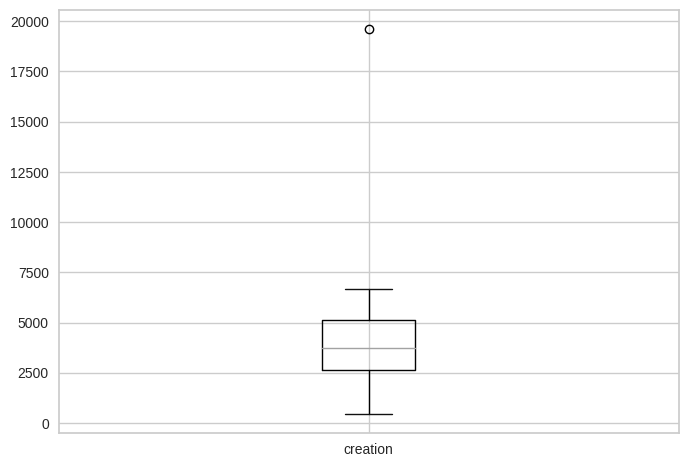

In [ ]:
# verificando outliers
columns_numeric = modelo.select_dtypes(include=['int64', 'float64']).columns.to_list()

for column in columns_numeric:
    plt.figure()
    modelo.boxplot([column])

## Modelo

In [ ]:
# aplicando one-hot enconding
pais = pd.get_dummies(modelo.Country)
cat = pd.get_dummies(modelo.channel_type)
join_all = modelo.join([pais,cat])
join_all = join_all.drop(columns={'Country','channel_type'})

In [ ]:
join_all

,rank,subscribers,video views,video_views_for_the_last_30_days,creation,Afghanistan,Andorra,Argentina,Australia,Bangladesh,Barbados,Brazil,Canada,Chile,China,Colombia,Cuba,Ecuador,Egypt,El Salvador,Finland,France,Germany,India,Indonesia,Iraq,Italy,Japan,Jordan,Kuwait,Latvia,Malaysia,Mexico,Morocco,Netherlands,Pakistan,Peru,Philippines,Russia,Samoa,Saudi Arabia,Singapore,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam,Animals,Autos,Comedy,Education,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech
101,102,36300000,3.010785e+09,21103000.0,6168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
187,188,28200000,1.441247e+10,158591000.0,5582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
519,520,17300000,1.026425e+09,46484000.0,3626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
70,71,41400000,1.760893e+10,180942000.0,6307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
427,428,19200000,4.329121e+09,2730000.0,4083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,25200000,1.552057e+10,64085000.0,5149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
468,469,18300000,8.798045e+09,64085000.0,3884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
508,509,17600000,3.752347e+09,64085000.0,3666,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
735,736,14500000,2.440718e+09,64085000.0,2682,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
s = setup(join_all, target = 'rank',
          session_id = 123,
          use_gpu=True,
          train_size=0.66,
          remove_outliers=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,rank
2,Target type,Regression
3,Original data shape,"(995, 68)"
4,Transformed data shape,"(962, 68)"
5,Transformed train set shape,"(623, 68)"
6,Transformed test set shape,"(339, 68)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [ ]:
best = compare_models(n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.3545,3.3335,1.7875,1.0000,0.0757,0.0381,0.9180
et,Extra Trees Regressor,1.1897,2.6315,1.5978,1.0000,0.0596,0.0278,0.9190
dt,Decision Tree Regressor,2.3809,8.9338,2.9515,0.9999,0.0619,0.0251,0.5160
gbr,Gradient Boosting Regressor,2.1844,7.6885,2.7679,0.9999,0.0626,0.0302,0.5610
lightgbm,Light Gradient Boosting Machine,2.6772,21.4831,4.3104,0.9997,0.1598,0.1275,1.2120
ada,AdaBoost Regressor,13.8723,325.3467,16.9305,0.9956,0.2424,0.2568,0.6420
lasso,Lasso Regression,28.5522,9034.5414,55.0843,0.8955,0.2444,3.6752,0.4560
llar,Lasso Least Angle Regression,28.5522,9034.5414,55.0843,0.8955,0.2444,3.6752,0.3430
br,Bayesian Ridge,28.6357,9044.5601,55.1462,0.8954,0.2463,3.6781,0.5920
en,Elastic Net,28.5790,9040.6460,55.1163,0.8954,0.2448,3.6762,0.4660


Processing:   0%|          | 0/94 [00:00<?, ?it/s]

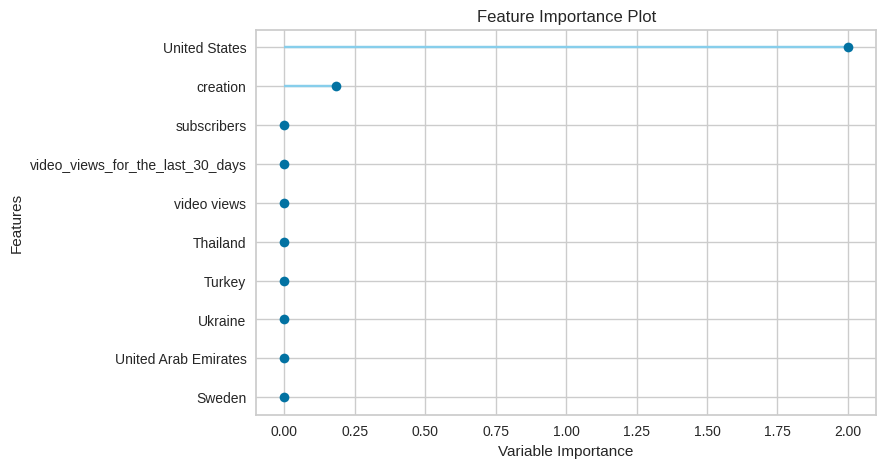

In [ ]:
# plot feature importance
plot_model(best[6], plot = 'feature')

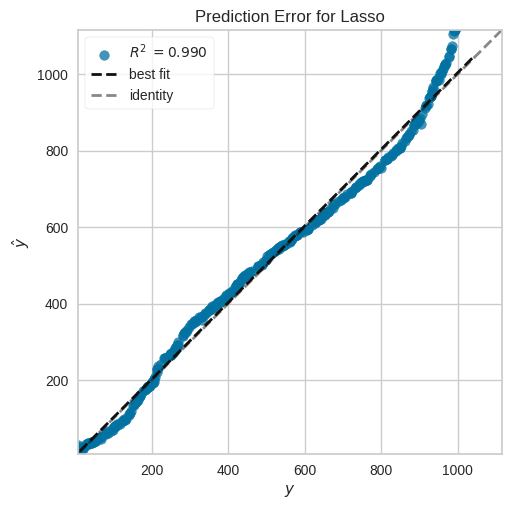

In [ ]:
plot_model(best[6], plot = 'error')

In [ ]:
best[6]

Lasso(random_state=123)

In [ ]:
save_model(best[6], 'Lasso')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['subscribers', 'video views',
                                              'video_views_for_the_last_30_days',
                                              'creation', 'Afghanistan',
                                              'Andorra', 'Argentina',
                                              'Australia', 'Bangladesh',
                                              'Barbados', 'Brazil', 'Canada',
                                              'Chile', 'China', 'Colombia',
                                              'Cuba', 'Ecuador', 'Egypt',
                                              'El Salvador', 'Finland', 'France',
                                              'Germany'...
                                              'Kuwait', 'Latvia', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer

In [ ]:
join_all.head()

,rank,subscribers,video views,video_views_for_the_last_30_days,creation,Afghanistan,Andorra,Argentina,Australia,Bangladesh,...,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech
101,102,36300000,3.010785e+09,21103000.0,6168,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
187,188,28200000,1.441247e+10,158591000.0,5582,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
519,520,17300000,1.026425e+09,46484000.0,3626,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
70,71,41400000,1.760893e+10,180942000.0,6307,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
427,428,19200000,4.329121e+09,2730000.0,4083,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Carregando o modelo
model = load_model('Lasso')

Transformation Pipeline and Model Successfully Loaded


,Rank,video_views_for_the_last_30_days,creation,subscribers,video views,Country,channel_type,Turkey,News,Philippines,...,Finland,Peru,Indonesia,rank,Thailand,Ukraine,Entertainment,United States,Jordan,Kuwait
0,0,100000000,5000,10000000,500000000,United States,Games,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Prepara uma entrada para predição
data = pd.DataFrame([[0, '10000000', '6500', '10000000', '5000000','United States','Games']])
data.columns = ['Rank','video_views_for_the_last_30_days','creation','subscribers','video views','Country','channel_type']
data[data['Country']] = 1
data[data['channel_type']] = 1
data.drop(columns={'Country','channel_type'})

,Rank,video_views_for_the_last_30_days,creation,subscribers,video views,United States,Games
0,0,10000000,6500,10000000,5000000,1,1


In [ ]:
# Criação dos dataframe com os outros dados do one hot encoding
columns = list(set(join_all.columns) - set(data.columns))
zero_array = []
for i in range(len(columns)):
  zero_array.append(0)
data2 = pd.DataFrame([zero_array])
data2.columns = columns

In [ ]:
# Join dos dois dataframes
data_prediction = data.join(data2)

In [ ]:
predictions = predict_model(model, data=data_prediction)
print({'prediction': predictions['prediction_label'][0]})

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,9.5783,91.7437,9.5783,nan,2.3588,nan


{'prediction': 9.578290861279811}


In [ ]:
# create api
create_api(model, 'model_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python model_api.py


In [ ]:
# Cria um servidor local na porta 8000
!python model_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [99971]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Finished server process [99971]
ERROR:    Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/starlette/routing.py", line 686, in lifespan
    await receive()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/lifespan/on.py", line 137, in receive
    return await self.receive_queue.get()
  File "/usr/lib/python3.10/asyncio/queues.py", line 159, in get
    await getter
asyncio.exceptions.CancelledError

